In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
import requests
requests.__version__

'2.26.0'

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Above code replaces the following
# Loop through all the cities in our list.
# for i in range(len(cities)):

    #Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | araouane
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | jahrom
City not found. Skipping...
Processing Record 6 of Set 1 | santa rosa
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | baiyin
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | vila
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | san ramon
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | mitu
Processing Record 18 of Set 1 | bundaberg
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | port-gentil
Processing Record 21 of Set 1 | mantua
Processing 

Processing Record 39 of Set 4 | bayangol
Processing Record 40 of Set 4 | wanning
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | kyren
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | karad
Processing Record 45 of Set 4 | viedma
Processing Record 46 of Set 4 | rovaniemi
Processing Record 47 of Set 4 | raudeberg
Processing Record 48 of Set 4 | half moon bay
Processing Record 49 of Set 4 | isla vista
Processing Record 50 of Set 4 | kiunga
Processing Record 1 of Set 5 | bhakkar
Processing Record 2 of Set 5 | bouafle
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | kinston
Processing Record 5 of Set 5 | madang
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | trairi
Processing Record 8 of Set 5 | trinidad
Processing Record 9 of Set 5 | tommot
Processing Record 10 of Set 5 | grindavik
Processing Record 11 of Set 5 | kamenskoye
City not found. Skipping...
Processing 

Processing Record 29 of Set 8 | nybro
Processing Record 30 of Set 8 | poum
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | yarim
Processing Record 33 of Set 8 | muisne
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | sokolo
Processing Record 36 of Set 8 | luangwa
Processing Record 37 of Set 8 | nurota
Processing Record 38 of Set 8 | banawang
Processing Record 39 of Set 8 | komsomolskiy
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | kuching
Processing Record 42 of Set 8 | sal rei
Processing Record 43 of Set 8 | wasilla
Processing Record 44 of Set 8 | coxim
Processing Record 45 of Set 8 | tautira
Processing Record 46 of Set 8 | cap malheureux
Processing Record 47 of Set 8 | saint-francois
Processing Record 48 of Set 8 | laguna
Processing Record 49 of Set 8 | alta floresta
Processing Record 50 of Set 8 | hambantota
Processing Record 1 of Set 9 | nemuro
Processing Record 2 of Set 

Processing Record 18 of Set 12 | abonnema
Processing Record 19 of Set 12 | ngunguru
Processing Record 20 of Set 12 | rungata
City not found. Skipping...
Processing Record 21 of Set 12 | basqal
Processing Record 22 of Set 12 | dongsheng
Processing Record 23 of Set 12 | nizwa
Processing Record 24 of Set 12 | fredericton
Processing Record 25 of Set 12 | quepos
Processing Record 26 of Set 12 | talcahuano
Processing Record 27 of Set 12 | mwinilunga
Processing Record 28 of Set 12 | kasongo
Processing Record 29 of Set 12 | kontagora
Processing Record 30 of Set 12 | slave lake
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | roros
Processing Record 33 of Set 12 | sterling
Processing Record 34 of Set 12 | te anau
Processing Record 35 of Set 12 | bowen
Processing Record 36 of Set 12 | independence
Processing Record 37 of Set 12 | bolu
Processing Record 38 of Set 12 | tarudant
City not found. Skipping...
Processing Record 39 of Set 12 | logrono
Processing Record 40 of Set 12

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,55.51,62,75,23.02,CL,2022-01-23 23:11:59
1,Tasiilaq,65.6145,-37.6368,15.96,51,55,11.21,GL,2022-01-23 23:11:59
2,Araouane,18.9048,-3.5265,63.57,12,1,12.50,ML,2022-01-23 23:08:50
3,Santa Rosa,14.3122,121.1114,77.86,85,76,3.27,PH,2022-01-23 23:11:02
4,Ushuaia,-54.8000,-68.3000,51.46,66,75,17.27,AR,2022-01-23 23:08:46
5,Hasaki,35.7333,140.8333,39.60,61,100,24.74,JP,2022-01-23 23:12:00
6,Baiyin,36.5583,104.2081,23.27,60,64,2.71,CN,2022-01-23 23:12:00
7,Vila,42.0304,-8.1588,35.33,81,0,2.89,PT,2022-01-23 23:12:01
8,Vaini,-21.2000,-175.2000,81.23,73,23,9.17,TO,2022-01-23 23:12:01
9,Albany,42.6001,-73.9662,27.48,83,100,2.13,US,2022-01-23 23:09:15


In [11]:
# Reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-01-23 23:11:59,-53.1500,-70.9167,55.51,62,75,23.02
1,Tasiilaq,GL,2022-01-23 23:11:59,65.6145,-37.6368,15.96,51,55,11.21
2,Araouane,ML,2022-01-23 23:08:50,18.9048,-3.5265,63.57,12,1,12.50
3,Santa Rosa,PH,2022-01-23 23:11:02,14.3122,121.1114,77.86,85,76,3.27
4,Ushuaia,AR,2022-01-23 23:08:46,-54.8000,-68.3000,51.46,66,75,17.27


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

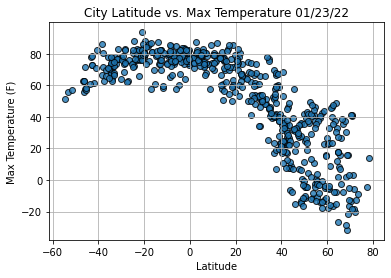

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

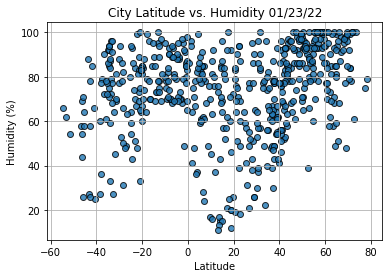

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

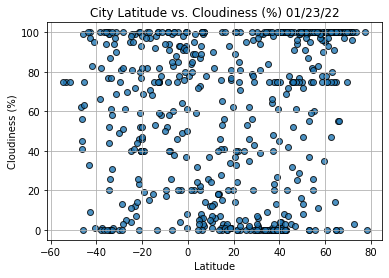

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

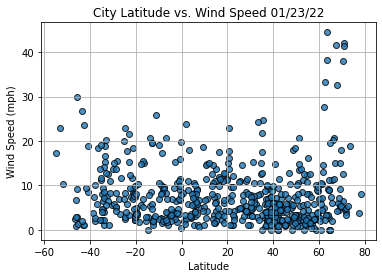

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                         Mitu
Country                        CO
Date          2022-01-23 23:09:11
Lat                        1.1983
Lng                      -70.1733
Max Temp                    74.35
Humidity                       96
Cloudiness                     84
Wind Speed                   2.06
Name: 13, dtype: object